<a href="https://colab.research.google.com/github/DPatt365/Prediction-of-Product-Sales/blob/main/Sales_PredictionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


filename = '/content/sales_predictions.csv'
df_sales = pd.read_csv(filename)

In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

In [10]:
print(f'There are {df_sales.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [12]:
df_sales['Item_Fat_Content'].value_counts()
df_sales.replace({'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)
df_sales['Item_Fat_Content'].value_counts() 

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
- Perform a train test split

In [13]:
#dropping item_identifier column because of high cardinality(unique values)
X = df_sales.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])
y = df_sales['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [14]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Create a preprocessing object to prepare the dataset for Machine Learning

In [15]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)


In [16]:
mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()


In [67]:
nom_pipeline = make_pipeline(missing_imputer, ohe)
num_pipeline = make_pipeline(mean_imputer, scaler)

In [68]:

num_tuple = (num_pipeline, num_selector)
cat_tuple = (nom_pipeline, cat_selector)

preprocessor = make_column_transformer(num_tuple, 
                                       cat_tuple, 
                                       remainder='drop')
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feeb4f12860>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feee761aad0>)])

In [69]:
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feeb4f12860>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7feee761aad0>)])

In [70]:
X_train_imputed = preprocessor.transform(X_train)
X_test_imputed = preprocessor.transform(X_test)


##1. Your first task is to build a linear regression model to predict sales.

- Build a linear regression model.
- Evaluate the performance of your model based on r^2.
- Evaluate the performance of your model based on rmse.

In [5]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [26]:
dummy = DummyRegressor(strategy='mean')

In [27]:
dummy_pipe = make_pipeline(preprocessor, dummy)

In [28]:
dummy_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feeb4f12860>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feee761aad0>)])),
                ('dummyregressor', DummyRegressor())])

In [29]:
train_pred = dummy_pipe.predict(X_train)
test_pred = dummy_pipe.predict(X_test)

In [30]:
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE =  mean_squared_error(y_test, test_pred)

print(f"Model Training MSE: {train_MSE}")
print(f"Model Training MSE: {test_MSE}")

Model Training MSE: 2959455.7045265585
Model Training MSE: 2772144.4627103633


In [31]:
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
lin_reg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feeb4f12860>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feee761aad0>)])),
                ('linearregression', LinearRegression())])

In [32]:
lin_reg_pipe.fit(X_train, y_train)

training_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)
training_pred[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([3810.25, 2652.25, 2607.25, 1482.75, 1873.75,  -65.5 , 1591.75,
       5651.25, 4200.25, 2045.75])

In [134]:
rmse_train =  mean_squared_error(y_train, training_pred, squared=False)
rmse_test = mean_squared_error(y_test, test_pred, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 1139.1
Test RMSE: 1092.87


In [34]:
print(f"Train R-Squared: { round( lin_reg_pipe.score(X_train, y_train),3) }")
print(f"Test R-Squared: { round( lin_reg_pipe.score(X_test, y_test),3) }")

Train R-Squared: 0.562
Test R-Squared: 0.567


##2. Your second task is to build a regression tree model to predict sales.

- Build a simple regression tree model.
- Compare the performance of your model based on r^2.
- Compare the performance of your model based on rmse.

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [93]:
dec_pipeline = make_pipeline(preprocessor, dec_tree)

In [95]:
dec_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feeb4f12860>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7feee761aad0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [96]:
train_preds = dec_pipeline.predict(X_train)
test_preds = dec_pipeline.predict(X_test)

In [97]:
train_score = dec_pipeline.score(X_train, y_train)
test_score = dec_pipeline.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.20575745028691628


In [112]:
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [113]:
train_preds = dec_tree.predict(X_train_proc)
test_preds = dec_tree.predict(X_test_proc)

In [114]:
train_score = dec_tree.score(X_train_proc, y_train)
test_score = dec_tree.score(X_test_proc, y_test)
print(train_score)
print(test_score)

1.0
0.20575745028691628


Model Tuning

In [115]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [117]:
dec_tree.get_depth()

40

In [119]:
dec_tree.get_n_leaves()

6271

In [123]:
dec_tree_20 = DecisionTreeRegressor(max_depth = 20, random_state = 42)
dec_tree_20.fit(X_train_proc, y_train)
train_20_score = dec_tree_20.score(X_train_proc, y_train)
test_20_score = dec_tree_20.score(X_test_proc, y_test)
print(train_20_score)
print(test_20_score)

0.9346656197901029
0.2576472877627044


In [128]:
depths = list(range(2,40)) 

scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_proc, y_train)
    train_score = dec_tree.score(X_train_proc, y_train)
    test_score = dec_tree.score(X_test_proc, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

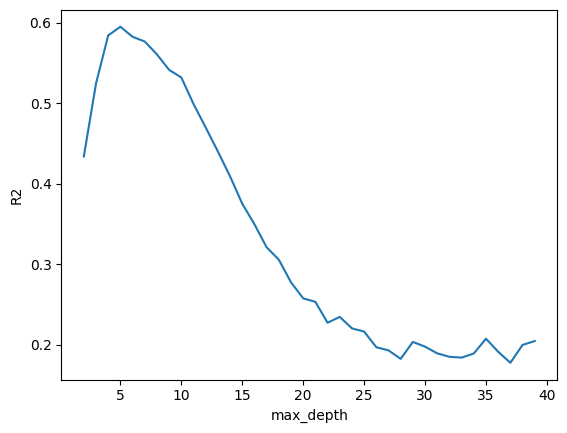

In [129]:
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [130]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582274,0.615161
7,0.576426,0.626843
8,0.560455,0.643832


In [137]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_proc, y_train)
train_5_score = dec_tree_5.score(X_train_proc, y_train)
test_5_score = dec_tree_5.score(X_test_proc, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


In [138]:
rmse_train =  mean_squared_error(y_train, train_preds, squared=False)
rmse_test = mean_squared_error(y_test, test_preds, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 0.0
Test RMSE: 1480.3


##3. You now have tried 2 different models on your data set. You need to determine which model to implement.

- Overall, which model do you recommend?
- Justify your recommendation.
 - I would choose to use the Decision Tree Regression model because the variance is lower which means the model is not over fit or underfit. 